# Crimson Hexagon Mini Olympics Buzz
---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, json, time, datetime, calendar, sqlalchemy
import warnings
warnings.filterwarnings("ignore") # dangerous
%matplotlib inline
def pct(a,b): return round(100*(b-a)/a, 2)
def pctof(a,b): return round(100*a/b, 2)
plt.rcParams['font.family'] = 'serif'

In [11]:
df = pd.read_csv('./data/Advertiser_crimsonhexagon.tsv', sep = '\t', parse_dates = ['datebin'])
df['t'] = np.arange(df.shape[0])
df.tail()

,datebin,total_posts,oly1,oly2,olympics_related,all_other_brand_mentions,t
37,2016-08-30,1056,5,3,8,1048,37
38,2016-08-31,976,4,0,4,972,38
39,2016-09-01,1051,2,8,10,1041,39
40,2016-09-02,996,0,7,7,989,40
41,2016-09-03,1043,0,20,20,1023,41


In [13]:
dg = df[['datebin','total_posts','olympics_related','t']]
dg.set_index('datebin', inplace = True)

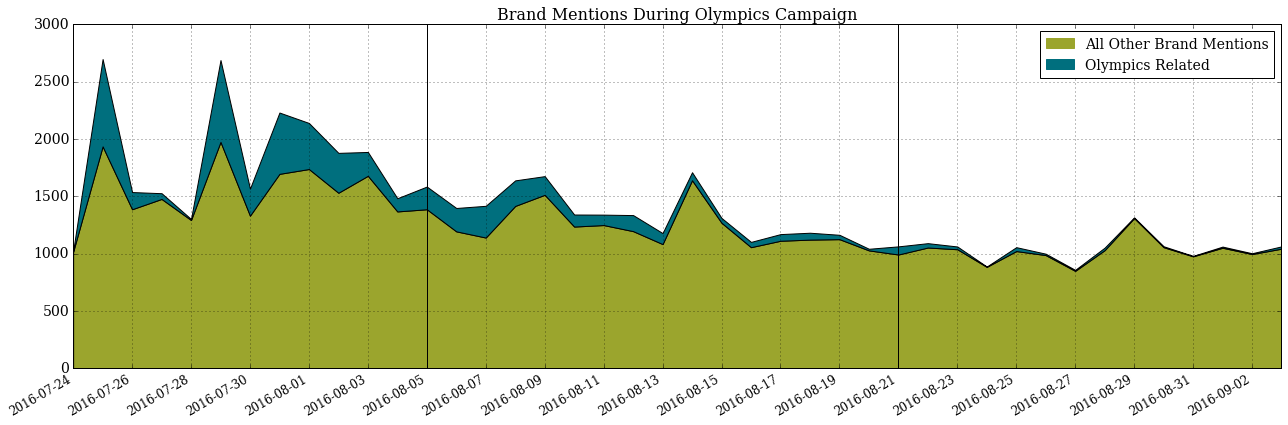

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (18, 6))
ax.stackplot(dg.index, dg.total_posts, dg.olympics_related, colors = ['#9BA52D','#006F7E'])
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mpl.dates.DayLocator(interval = 2))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
ax.set_title('Brand Mentions During Olympics Campaign', fontsize = 16)
ax.grid()
for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_yticklabels()):
    item.set_fontsize(14)
for item in ax.get_xticklabels():
    item.set_fontsize(12)
plt.axvline(x = '2016-08-05', lw = 1, c = 'black')
plt.axvline(x = '2016-08-21', lw = 1, c = 'black')
p1 = mpl.patches.Patch(color = '#9BA52D', label = 'All Other Brand Mentions')
p2 = mpl.patches.Patch(color = '#006F7E', label = 'Olympics Related')
plt.legend(handles = [p1, p2], fontsize = 14)
plt.tight_layout()
plt.savefig('Advertiser_olympics_weekly_20160906.svg')
plt.savefig('Advertiser_olympics_weekly_20160906.eps')
plt.savefig('Advertiser_olympics_weekly_20160906.pdf')
plt.savefig('Advertiser_olympics_weekly_20160906.png', dpi = 1200)
plt.show()

In [4]:
lw = slice('2016-08-21','2016-08-27')
tw = slice('2016-08-28','2016-09-03')
tlw = dg[lw].total_posts.sum()
olw = dg[lw].olympics_related.sum()
ttw = dg[tw].total_posts.sum()
otw = dg[tw].olympics_related.sum()
totb = dg.total_posts.sum()
toto = dg.olympics_related.sum()

In [5]:
print((ttw, tlw, pct(tlw, ttw), totb))

(7462, 6825, 9.33, 52481)


In [6]:
print((otw, olw, pct(olw, otw), toto))

(77, 191, -59.69, 5628)


In [7]:
print((pctof(otw,ttw), pctof(olw,tlw), pct(pctof(olw,tlw), pctof(otw,ttw)), pctof(toto,totb)))

(1.03, 2.8, -63.21, 10.72)


In [14]:
dg.head()

,total_posts,olympics_related,t
datebin,,,
2016-07-24,1016,6,0
2016-07-25,1936,762,1
2016-07-26,1387,150,2
2016-07-27,1477,50,3
2016-07-28,1293,9,4


LinregressResult(slope=-15.957458876914348, intercept=1576.6755260243631, rvalue=-0.70364843813682987, pvalue=2.0164528259654171e-07, stderr=2.5478368238222147)
LinregressResult(slope=-9.1585771007211747, intercept=321.75083056478411, rvalue=-0.6188480335862836, pvalue=1.2512298907945738e-05, stderr=1.8380872318401422)


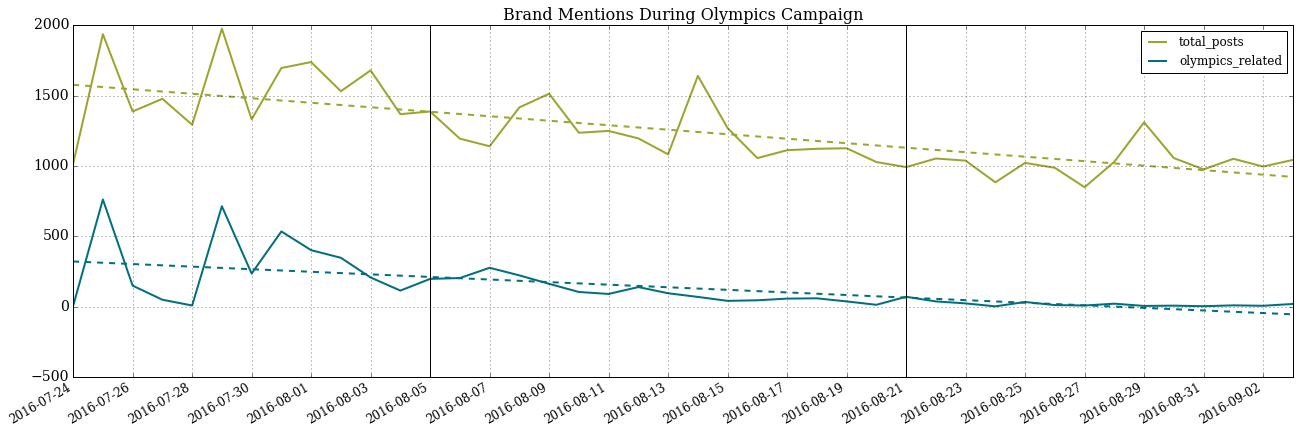

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (18, 6))
ax.plot(dg.index, dg.total_posts, c = '#9BA52D', lw = 2)
ax.plot(dg.index, dg.olympics_related, c = '#006F7E', lw = 2)
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mpl.dates.DayLocator(interval = 2))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
ax.set_title('Brand Mentions During Olympics Campaign', fontsize = 16)
ax.grid()
ax.legend()
plt.axvline(x = '2016-08-05', lw = 1, c = 'black')
plt.axvline(x = '2016-08-21', lw = 1, c = 'black')
plt.tight_layout()
lsfit_tp = scipy.stats.linregress(dg.t, dg.total_posts)
lsfit_or = scipy.stats.linregress(dg.t, dg.olympics_related)
print(lsfit_tp)
print(lsfit_or)
ax.plot(dg.index, (dg.t * lsfit_tp.slope + lsfit_tp.intercept), c = '#9BA52D', lw = 2, ls = '--')
ax.plot(dg.index, (dg.t * lsfit_or.slope + lsfit_or.intercept), c = '#006F7E', lw = 2, ls = '--')
for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_yticklabels()):
    item.set_fontsize(14)
for item in ax.get_xticklabels():
    item.set_fontsize(12)